In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from scipy.stats import pearsonr
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression as LR
from sklearn.metrics import r2_score
from scipy.stats.mstats import winsorize

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
file = '/content/Life Expectancy Data.csv'

In [ ]:
df = pd.read_csv(file)

# Data Understanding

In [ ]:
df.shape

(2938, 22)

In [ ]:
df.sample(10)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
1661,Mauritania,2005,Developing,66.0,223.0,8,0.01,55.121871,42.0,127,24.2,12,71.0,4.21,71.0,1.3,697.745199,31372.0,9.8,9.6,0.461,7.2
1013,Ghana,2012,Developing,61.6,257.0,39,0.01,151.899429,92.0,1613,26.7,56,91.0,4.79,92.0,0.9,1629.822200,2573349.0,6.7,6.6,0.563,11.2
2059,Portugal,2011,Developed,82.0,85.0,0,11.92,3108.288623,97.0,2,58.8,0,97.0,1.70,97.0,0.1,23196.183750,155756.0,0.7,0.5,0.818,16.2
1768,Mozambique,2011,Developing,54.3,47.0,66,0.94,40.806180,76.0,177,2.9,94,73.0,6.23,76.0,9.6,526.531352,249395.0,3.7,3.6,0.397,9.5
1305,Jamaica,2008,Developing,74.5,145.0,1,3.51,31.765758,92.0,2,48.9,1,91.0,5.40,91.0,0.4,492.492378,279122.0,1.9,1.7,0.718,12.6
1054,Grenada,2003,Developing,71.1,173.0,0,9.75,77.945433,97.0,0,39.4,0,98.0,5.89,97.0,0.1,5773.735770,NaN,4.0,4.1,0.000,14.6
1636,Malta,2013,Developed,81.1,57.0,0,8.58,374.294728,94.0,0,68.8,0,99.0,9.89,99.0,0.1,2393.188800,423374.0,0.8,0.7,0.828,14.2
1571,Malawi,2014,Developing,57.6,377.0,27,0.01,59.487449,91.0,3,19.2,40,87.0,11.38,91.0,5.1,354.725396,1768838.0,6.5,6.3,0.466,10.7
1945,Pakistan,2012,Developing,65.7,165.0,369,0.04,59.659001,72.0,8046,23.2,456,72.0,2.76,72.0,0.1,1261.289670,177911533.0,19.8,2.2,0.529,7.6
2908,Zambia,2013,Developing,63.0,328.0,29,2.41,20.623063,79.0,35,22.3,42,74.0,4.99,79.0,4.8,185.793359,1515321.0,6.4,6.2,0.565,12.5


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [ ]:
#rename the header to meaningful name
df.rename(columns={'Life expectancy': 'Life Expectancy',
                   'infant deaths': 'Infant Deaths',
                   'percentage expenditure': 'Percentage Expenditure',
                   'Measles': 'Measles',
                   'BMI': 'BMI',
                   'under-five deaths': 'Under Five Deaths',
                   'Diphtheria': 'Diphtheria Vaccination %',
                   'HIV/AIDS': 'HIV/AIDS',
                   'thinness  1-19 years': 'Thinness 10-19 years',
                   'thinness 5-9 years': 'Thinness 5-9 years',
                   'Income composition of resources': 'Resources Income Composition',
                   'Total expenditure': 'Total Expenditure',
                   'Polio': 'Pol3 Vaccination %',
                   'Hepatitis B': 'HepB Vaccination %', 
                   'Alcohol': 'Alcohol Intake(L)'
                  },inplace=True)
df.columns

Index(['Country', 'Year', 'Status', 'Life Expectancy', 'Adult Mortality',
       'Infant Deaths', 'Alcohol Intake(L)', 'Percentage Expenditure',
       'HepB Vaccination %', 'Measles', 'BMI', 'Under Five Deaths',
       'Pol3 Vaccination %', 'Total Expenditure', 'Diphtheria Vaccination %',
       'HIV/AIDS', 'GDP', 'Population', 'Thinness 10-19 years',
       'Thinness 5-9 years', 'Resources Income Composition', 'Schooling'],
      dtype='object')

In [ ]:
df['Country'].unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia (Plurinational State of)', 'Bosnia and Herzegovina',
       'Botswana', 'Brazil', 'Brunei Darussalam', 'Bulgaria',
       'Burkina Faso', 'Burundi', "Côte d'Ivoire", 'Cabo Verde',
       'Cambodia', 'Cameroon', 'Canada', 'Central African Republic',
       'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo',
       'Cook Islands', 'Costa Rica', 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', "Democratic People's Republic of Korea",
       'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany'

In [ ]:
df['Status'].unique()

array(['Developing', 'Developed'], dtype=object)

In [ ]:
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Life Expectancy                  10
Adult Mortality                  10
Infant Deaths                     0
Alcohol Intake(L)               194
Percentage Expenditure            0
HepB Vaccination %              553
Measles                           0
BMI                              34
Under Five Deaths                 0
Pol3 Vaccination %               19
Total Expenditure               226
Diphtheria Vaccination %         19
HIV/AIDS                          0
GDP                             448
Population                      652
Thinness 10-19 years             34
Thinness 5-9 years               34
Resources Income Composition    167
Schooling                       163
dtype: int64

# Data Preprocessing

In [ ]:
df['Country'] = df['Country'].astype('string')
df['Status'] = df['Status'].astype('string')

In [ ]:
df['Status'] = LabelEncoder().fit_transform(df['Status'])
df['Status'].unique()
#developing : 1, developed : 0

array([1, 0])

In [ ]:
# Dealing with Missing Values (replacing with mean value for the year)
null_col = ('Life Expectancy', 'Adult Mortality', 'Alcohol Intake(L)', 'HepB Vaccination %', 'BMI', 'Pol3 Vaccination %', 'Total Expenditure', 'Diphtheria Vaccination %', 'GDP', 'Population', 'Thinness 10-19 years', 'Thinness 5-9 years', 'Resources Income Composition', 'Schooling')
data_valid = []
for year in list(df.Year.unique()):
    year_data = df[df.Year == year].copy()
    for col in null_col:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().mean()).copy()
    data_valid.append(year_data)
df = pd.concat(data_valid).copy()
df.isnull().sum(axis = 0)

Country                         0
Year                            0
Status                          0
Life Expectancy                 0
Adult Mortality                 0
Infant Deaths                   0
Alcohol Intake(L)               0
Percentage Expenditure          0
HepB Vaccination %              0
Measles                         0
BMI                             0
Under Five Deaths               0
Pol3 Vaccination %              0
Total Expenditure               0
Diphtheria Vaccination %        0
HIV/AIDS                        0
GDP                             0
Population                      0
Thinness 10-19 years            0
Thinness 5-9 years              0
Resources Income Composition    0
Schooling                       0
dtype: int64

In [ ]:
percent_low = []
percent_high = []

numeric_cols = [] 
for i in df.columns:
    if i != 'Status' and df[i].dtype in (np.float64, np.int64, np.int32):
        numeric_cols.append(i)
        
for col in numeric_cols:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    low = q1 - (iqr*1.5)
    high = q3 + (iqr*1.5)
    count_l = len(np.where(df[col] < low)[0])
    count_h = len(np.where(df[col] > high)[0])
    percent_low.append(round(count_l/len(df[col])*100, 2))
    percent_high.append(round(count_h/len(df[col])*100, 2))
outlier_table = pd.DataFrame({'Factor':numeric_cols, 'Lower Bound %':percent_low, 'Upper Bound %':percent_high})
outlier_table

,Factor,Lower Bound %,Upper Bound %
0,Year,0.00,0.00
1,Life Expectancy,0.58,0.00
2,Adult Mortality,0.00,2.93
3,Infant Deaths,0.00,10.72
4,Alcohol Intake(L),0.00,0.10
5,Percentage Expenditure,0.00,13.24
6,HepB Vaccination %,7.56,0.00
7,Measles,0.00,18.45
8,BMI,0.00,0.00
9,Under Five Deaths,0.00,13.41


In [ ]:
df_test = df.drop(['Country'], axis='columns')
df_test = df_test[~((df_test<low) | (df_test>high)).any(axis=1)]
df_test.shape

(0, 21)

In [ ]:
# Winzorization 
for i,col in enumerate(numeric_cols, 1):
    df[col] = winsorize(df[col], (max(percent_low)/100, max(percent_high)/100)) 

In [ ]:
df.sample(5)

,Country,Year,Status,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol Intake(L),Percentage Expenditure,HepB Vaccination %,Measles,BMI,Under Five Deaths,Pol3 Vaccination %,Total Expenditure,Diphtheria Vaccination %,HIV/AIDS,GDP,Population,Thinness 10-19 years,Thinness 5-9 years,Resources Income Composition,Schooling
719,Democratic People's Republic of Korea,2001,1,66.6,177.0,16,2.53,0.000000,73.957895,0,25.7,21,98.0,5.599609,62.0,0.1,4854.527638,1.007057e+07,5.9,6.0,0.563012,10.950289
577,Colombia,2013,1,74.6,144.0,11,4.38,687.577636,55.000000,0,57.2,12,53.0,7.200000,49.0,0.1,7913.383432,1.536564e+07,2.1,1.9,0.720000,13.600000
935,France,2010,1,77.3,86.0,3,8.75,72.800121,65.000000,899,12.3,3,98.0,8.000000,98.0,0.1,473.342790,6.527512e+06,0.8,0.8,0.803000,14.900000
341,Botswana,2010,1,61.1,267.0,2,5.99,547.038668,95.000000,853,35.2,3,96.0,5.640000,95.0,1.8,6346.156240,2.148660e+05,8.0,7.8,0.669000,12.300000
1690,Mexico,2008,1,75.6,127.0,31,5.36,159.877226,97.000000,0,58.1,43,96.0,6.600000,96.0,0.1,9685.908944,1.136619e+07,1.7,1.6,0.735000,12.300000


# EDA

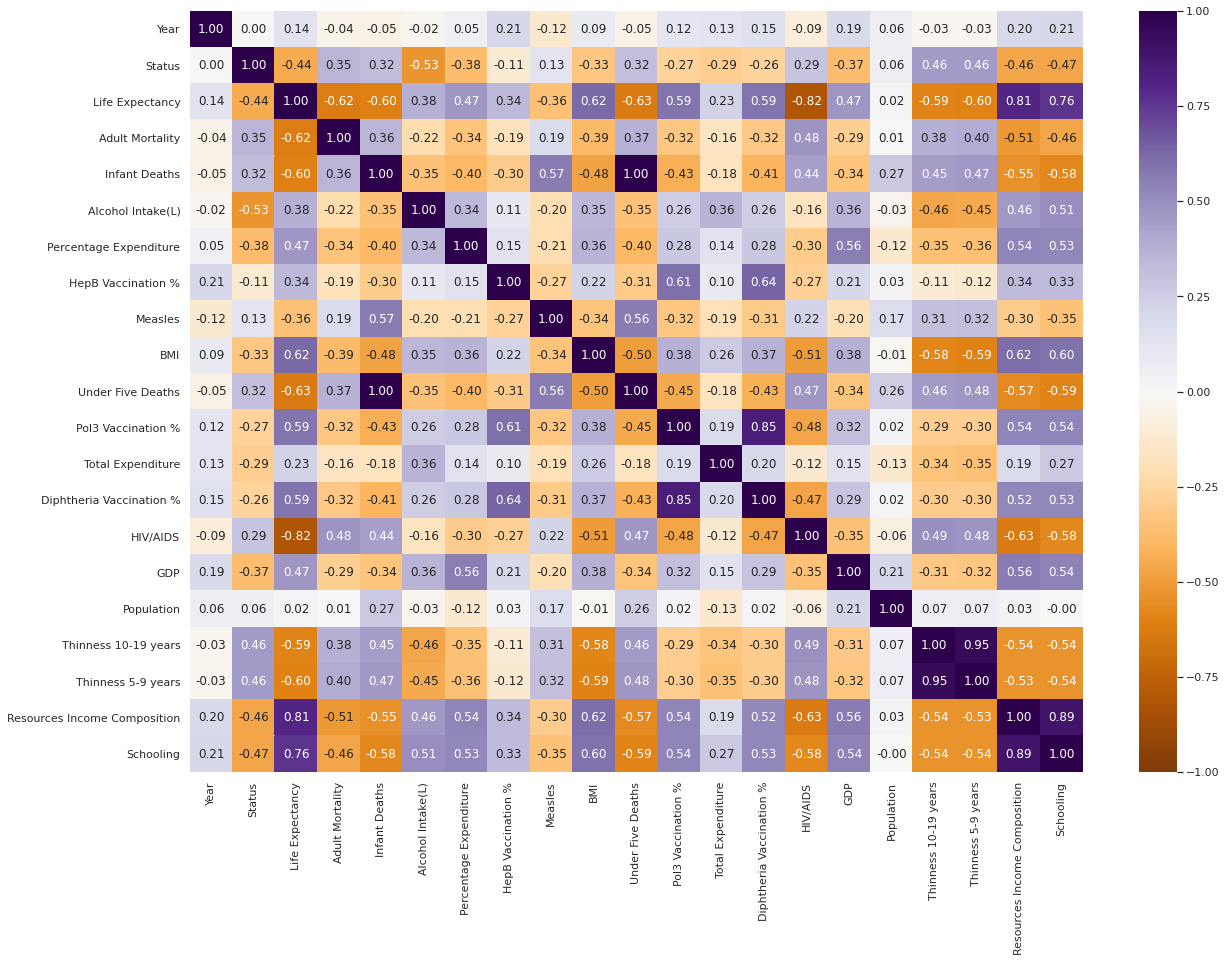

In [ ]:
corr_matrix = df.corr('pearson')
sns.set(rc = {'figure.figsize' : (20,14)})
sns.heatmap(corr_matrix, cmap = 'PuOr', fmt = '.2f', annot= True,vmin = -1, vmax = 1, center= 0);

In [ ]:
# Correlation Statistics
p_coef, p_val, rel, res = [], [], [], []

numeric_cols = [] 
for i in df.columns:
    if df[i].dtype in (np.float64, np.int64, np.int32): #i != 'Status' and
        numeric_cols.append(i)
        
y = df['Life Expectancy']
for col in numeric_cols:
    #if col == 'Life Expectancy': continue
    coef, val = pearsonr(df[col], y)
    p_coef.append(coef)
    p_val.append(val)
    if coef > 0:
        if coef > 0.5: rel.append('Strong Positive')
        else: rel.append('Weak Positive')
    elif coef < 0:
        if coef < -0.5: rel.append('Strong Negative')
        else: rel.append('Weak Negative')
    else:
        rel.append('Nil')
        
    if val < 0.001:
        res.append('Strong')
    elif val < 0.05:
        res.append('Moderate')
    elif val < 0.1:
        res.append('Weak')
    else:
        res.append('Nil')

abs_p_coef = np.abs(p_coef)
corelation_table = pd.DataFrame({'Factor':numeric_cols, 'Coefficient':p_coef, 'P-value':p_val, 'Relation':rel, 'Result Certainity':res, 'temp': abs_p_coef})
corelation_table = corelation_table.sort_values(by=['temp', 'P-value'], ascending = False).reset_index(drop=True) 
corelation_table = corelation_table.drop(['temp'], axis = 1)
corelation_table

,Factor,Coefficient,P-value,Relation,Result Certainity
0,Life Expectancy,1.000000,0.000000e+00,Strong Positive,Strong
1,HIV/AIDS,-0.817994,0.000000e+00,Strong Negative,Strong
2,Resources Income Composition,0.810609,0.000000e+00,Strong Positive,Strong
3,Schooling,0.757946,0.000000e+00,Strong Positive,Strong
4,Under Five Deaths,-0.629121,9.881313e-324,Strong Negative,Strong
5,Adult Mortality,-0.618449,1.131544e-309,Strong Negative,Strong
6,BMI,0.617655,1.165492e-308,Strong Positive,Strong
7,Infant Deaths,-0.601791,5.158060e-289,Strong Negative,Strong
8,Thinness 5-9 years,-0.597486,7.169131e-284,Strong Negative,Strong
9,Thinness 10-19 years,-0.593594,2.740681e-279,Strong Negative,Strong


# Q1 & Q2 - Build Linear Regression Model

    Let xi = value of the index i features
        i  = range(1,20) 
        i index indicate the feature according to the corelation ranking table

In [ ]:
y = df['Life Expectancy'].values.reshape(-1,1)

## Model1
Schooling is chosen as the independent variable for model1 because this feature has the highest corelation(0.71606) with life expectancy.

**y = 73.996 - 9.3965x1**

In [ ]:
X = df['HIV/AIDS'].values.reshape(-1,1)

X = sm.add_constant(X)
model1 = sm.OLS(y,X).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.669
Method:                 Least Squares   F-statistic:                     5937.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:23:48   Log-Likelihood:                -8565.4
No. Observations:                2938   AIC:                         1.713e+04
Df Residuals:                    2936   BIC:                         1.715e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.9960      0.105    708.006      0.000      73.791      74.201
x1            -9.3965      0.122    -77.053      0.000      -9.636      -9.157
==============================================================================
Omnibus:                      185.911   Durbin-Watson:                   1.881
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              276.498
Skew:                          -0.529   Prob(JB):                     9.11e-61
Kurtosis:                       4.067   Cond. No.                         2.09
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Model2
For Model2, we are choosing all the features that have strong corelation(>0.5 or <-0.5) with life expectancy no matter it is positive or negative corelation.

**y = 59.2565 - 4.364x1 + 14.7097x2 + 0.0973x3 - 0.287x4 - 0.0138x5 + 0.0067x6 +0.3375x7 - 0.2714x8 + 0.0225x9 + 0.0242x10 + 0.0342x11**

In [ ]:
X = df[['HIV/AIDS', 'Resources Income Composition', 'Schooling', 'Under Five Deaths', 'Adult Mortality', 'BMI', 'Infant Deaths', 'Thinness 5-9 years', 'Thinness 10-19 years', 'Pol3 Vaccination %', 'Diphtheria Vaccination %']]

X = sm.add_constant(X)
model2 = sm.OLS(y,X).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     1743.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:23:48   Log-Likelihood:                -7220.2
No. Observations:                2938   AIC:                         1.446e+04
Df Residuals:                    2926   BIC:                         1.454e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           59.2565      0.567    104.561      0.000      58.145      60.368
HIV/AIDS                        -4.3640      0.111    -39.151      0.000      -4.583      -4.145
Resources Income Composition    14.7097      0.878     16.762      0.000      12.989      16.430
Schooling                        0.0973      0.052      1.884      0.060      -0.004       0.199
Under Five Deaths               -0.2870      0.034     -8.546      0.000      -0.353      -0.221
Adult Mortality                 -0.0138      0.001    -18.619      0.000      -0.015      -0.012
BMI                              0.0067      0.004      1.582      0.114      -0.002       0.015
Infant Deaths                    0.3375      0.047      7.124      0.000       0.245       0.430
Thinness 5-9 years              -0.2714      0.061     -4.480      0.000      -0.390      -0.153
Thinness 10-19 years             0.0225      0.061      0.372      0.710      -0.096       0.141
Pol3 Vaccination %               0.0242      0.007      3.538      0.000       0.011       0.038
Diphtheria Vaccination %         0.0342      0.006      5.357      0.000       0.022       0.047
==============================================================================
Omnibus:                       88.839   Durbin-Watson:                   2.106
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.839
Skew:                          -0.018   Prob(JB):                     1.23e-50
Kurtosis:                       4.370   Cond. No.                     3.47e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.47e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Model3
*Life expectancy is affected by many factors such as: socioeconomic status, including employment, income, education and economic wellbeing. (The Department of Health, November 2012).*

Thus, we improve the Model2 by adding the Status feature. 

**y = 60.1671 - 4.3958x1 + 14.3827x2 + 0.0757x3 - 0.03063x4 - 0.0133x5 + 0.0075x6 + 0.3647x7 - 0.2575x8 + 0.0399x9 + 0.0238x10 + 0.034x11 - 0.732x12**

In [ ]:
X = df[['HIV/AIDS', 'Resources Income Composition', 'Schooling', 'Under Five Deaths', 'Adult Mortality', 'BMI', 'Infant Deaths', 'Thinness 5-9 years', 'Thinness 10-19 years', 'Pol3 Vaccination %', 'Diphtheria Vaccination %', 'Status']]

X = sm.add_constant(X)
model3 = sm.OLS(y,X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                     1609.
Date:                Mon, 13 Sep 2021   Prob (F-statistic):               0.00
Time:                        10:23:48   Log-Likelihood:                -7210.5
No. Observations:                2938   AIC:                         1.445e+04
Df Residuals:                    2925   BIC:                         1.452e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================================
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const                           60.1671      0.602    100.018      0.000      58.988      61.347
HIV/AIDS                        -4.3958      0.111    -39.477      0.000      -4.614      -4.177
Resources Income Composition    14.3827      0.878     16.382      0.000      12.661      16.104
Schooling                        0.0757      0.052      1.464      0.143      -0.026       0.177
Under Five Deaths               -0.3063      0.034     -9.071      0.000      -0.372      -0.240
Adult Mortality                 -0.0133      0.001    -17.917      0.000      -0.015      -0.012
BMI                              0.0075      0.004      1.795      0.073      -0.001       0.016
Infant Deaths                    0.3647      0.048      7.658      0.000       0.271       0.458
Thinness 5-9 years              -0.2575      0.060     -4.259      0.000      -0.376      -0.139
Thinness 10-19 years             0.0399      0.061      0.658      0.511      -0.079       0.159
Pol3 Vaccination %               0.0238      0.007      3.485      0.000       0.010       0.037
Diphtheria Vaccination %         0.0340      0.006      5.344      0.000       0.022       0.046
Status                          -0.7320      0.166     -4.406      0.000      -1.058      -0.406
==============================================================================
Omnibus:                       87.920   Durbin-Watson:                   2.098
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              225.272
Skew:                           0.029   Prob(JB):                     1.21e-49
Kurtosis:                       4.355   Cond. No.                     3.50e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.5e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Q3 Compare the three models


    R-squared (R^2) is a statistical measure that shows the proportion of the variance for a dependent variable that's explained by independent variables in a regression model. The correlation represents the strength of relationship between the dependent variable and independent variables. (Free Code Camp, 2017). R-Squared only works as intended in a simple linear regression model with one explanatory variable. With a multiple regression made up of several independent variables, the R-Squared must be adjusted. The adjusted R-squared compares the descriptive power of regression models that include diverse numbers of predictors. (Investopedia, 2021). 

        Model 3 is the best model due to the highest value of R^2 that indicates the goodness of fitness to the model is 0.78217, which means that 78.217% of data fit into this model. However, model 1 and model 2 only got 77.548% and 51.2576% respectively.

In [ ]:
r2_table = pd.DataFrame({'Model': ['Model 1', 'Model 2', 'Model 3'], 'Adjusted R^2' : [model1.rsquared_adj,model2.rsquared_adj,model3.rsquared_adj,]})
r2_table = r2_table.sort_values(by=['Adjusted R^2'], ascending = False).reset_index(drop=True) 
r2_table.index += 1 
r2_table.style.set_caption("Ranking of Adj R^2")

,Model,Adjusted R^2
1,Model 3,0.867910
2,Model 2,0.867079
3,Model 1,0.669002


# Q4
**AIM: find the optimal interval of life expectancy when people live in perfect and optimal condition**

-get the maximum value when the features is positive corelation

-get then minimum value when the features is negative corelation

-get the mean value for BMI to prevent overweight or underweight 

In [ ]:
predictions = model3.get_prediction([1,df['HIV/AIDS'].min(), df['Resources Income Composition'].max(), df['Schooling'].max(), df['Under Five Deaths'].min(), df['Adult Mortality'].min(), df['BMI'].mean(), df['Infant Deaths'].max(), df['Thinness 5-9 years'].min(), df['Thinness 10-19 years'].max(), df['Pol3 Vaccination %'].max(), df['Diphtheria Vaccination %'].max(), df['Status'].min()])
predictions.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,89.521224,1.521808,86.5373,92.505148,83.234421,95.808027


In [ ]:
pd.DataFrame({'Featues': ['HIV/AIDS', 'Resources Income Composition', 'Schooling', 'Under Five Deaths', 'Adult Mortality', 'BMI', 'Infant Deaths', 'Thinness 5-9 years', 'Thinness 10-19 years', 'Pol3 Vaccination %', 'Diphtheria Vaccination %', 'Status'], 'Value':[df['HIV/AIDS'].min(), df['Resources Income Composition'].max(), df['Schooling'].max(), df['Under Five Deaths'].min(), df['Adult Mortality'].min(), df['BMI'].mean(), df['Infant Deaths'].max(), df['Thinness 5-9 years'].min(), df['Thinness 10-19 years'].max(), df['Pol3 Vaccination %'].max(), df['Diphtheria Vaccination %'].max(), df['Status'].min()]})

,Featues,Value
0,HIV/AIDS,0.100000
1,Resources Income Composition,0.803000
2,Schooling,14.900000
3,Under Five Deaths,0.000000
4,Adult Mortality,19.000000
5,BMI,38.156524
6,Infant Deaths,31.000000
7,Thinness 5-9 years,0.800000
8,Thinness 10-19 years,8.000000
9,Pol3 Vaccination %,98.000000


# **Conclusion**
Model 3 are the best model and we are 95% confident to say that people are able to live for 86.54years to 92.51years when people likely to go schooling for 14.9years and control their BMI at 38.16, at the same time the country is developed, utilizes its resources productively at the index of 0.803, improve the vaccination coverage of Pol3 and Diphtheria to 98%, take action to lower the death rate of HIV/AIDS (0-4years), under five deaths and infant deaths to 0.1, 0 and 0.031 respectively, lastly lower the adult mortality rate to 0.019. Moreover, the prevalence of thinness in the society among 5-9years and among 10-19 years should be at 0.8% and 8% respectively.  